# Making a line plot in python with pandas

Chris + Dani 
Just search python, panadas when you looking for help pages

In [5]:
'''
making plots for reproducibility review with chris, practice loading a file, wrangle, plot
'''

#setup
import os 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
   
pathdir = "Python1_Data/"
files_xls = os.listdir(pathdir)
print(files_xls) # only returns the filenames of the directory you passed, but not the full path to the files

# init empty dataframe to put stuff in 
repo_data = pd.DataFrame()

# loop through, open files, skip the first (?) lines
for f in files_xls:
    print(pathdir + f)
    data = pd.read_excel(pathdir + f, 'Sheet1', skiprows = 4)
    repo_data = repo_data.append(data)
    
# if you had a simple csv file or something
#pd.read_csv("Practice_Plots_Round1_LitRev.csv", encoding='utf-8') # sometimes you will get error about encoding

repo_data.head()

['JK_Master_Raw_Literature_List.xlsx', 'KM_Master_Raw_Literature_List.xlsx', 'CM_Master_Raw_Literature_List.xlsx']
Python1_Data/JK_Master_Raw_Literature_List.xlsx
Python1_Data/KM_Master_Raw_Literature_List.xlsx
Python1_Data/CM_Master_Raw_Literature_List.xlsx


,Back_pearl,Confidence,DOI,Data_code,Database,Effort,Eval,First_author,For_pearl,Found_by,Full _title,Method,Samp_code,Taxonomy,Unnamed: 16,Upload,Year
0,No,Yes,https://doi.org/10.1016/j.aquatox.2020.105520,RNA,Google_Scholar,1,No,Lai,No,jk,Hypoxia causes sex-specific hepatic toxicity a...,DS,L,Oryzias melastigma,NaN,https://drive.google.com/drive/folders/11L6uNd...,2020.0
1,No,Yes,https://doi.org/10.1038/s41598-020-78351-w,RNA,Google_Scholar,1,No,Niu,No,jk,Multi-omic appraoch provides insights into osm...,DS,L,Scylla paramamosain,NaN,https://drive.google.com/drive/folders/11L6uNd...,2020.0
2,No,Yes,http://dx.doi.org/10.1098/rspb.2017.2654,RNA,Google_Scholar,1,No,Cziesielski,No,jk,Multi-omics analysis of thermal stress respons...,DS,L,Aiptasia pallida,NaN,https://drive.google.com/drive/folders/1OFGhjl...,2018.0
3,No,No (unsure of method),https://doi.org/10.1007/s10811-018-1588-x,RNA,Google_Scholar,1,No,Barati,No,jk,Gene expression profile of marine Chlorella st...,DS,L,Chlorella,NaN,https://drive.google.com/drive/folders/1OFGhjl...,2018.0
4,No,Yes,https://doi.org/10.1016/j.scitotenv.2019.05.127,RNA,Google_Scholar,1,No,Su,No,jk,Identification of putative key genes for coast...,DS,L,Kandelia obovata,NaN,No (don't have access through W&M),2019.0


In [6]:
# how many from each repo?
repo_data['Database'].value_counts()

Web_of_Science    154
Google_Scholar    101
Name: Database, dtype: int64

In [7]:
# get as a percentage 
repo_data['Database'].value_counts(normalize=True)

Web_of_Science    0.603922
Google_Scholar    0.396078
Name: Database, dtype: float64

In [8]:
'''
Make the same chart Sam re: cumulative effort made in R, but do it in python 
'''
# sam filtered on DOI 

# check before filter of DOI
print(repo_data.shape)
# filter
repo_data = repo_data.drop_duplicates('DOI')
# check after filter of DOI
print(repo_data.shape)

(255, 17)
(240, 17)


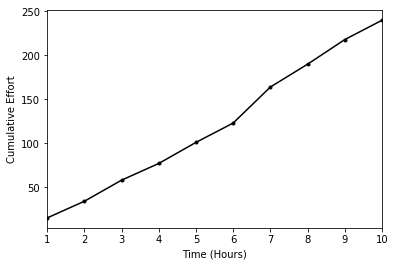

In [46]:
# cumulative effort, make a new dataframe
hits_by_effort_df = pd.DataFrame({'Hits': repo_data['Effort']})
# get how many rows per hour 
hits_by_effort_df_toPlot = pd.DataFrame({'Counts': hits_by_effort_df['Hits'].value_counts().sort_index(ascending=True)}) # you need to sort index to get the rows in the correct order here
hits_by_effort_df_toPlot['Cumulative Effort'] = hits_by_effort_df_toPlot['Counts'].cumsum()# add cumsum 
hits_by_effort_df_toPlot

# make a line plot
plt = hits_by_effort_df_toPlot.plot(style='.-', y= 'Cumulative Effort', legend=False) #. the style='.-' adds points to the line
plt.set_ylabel("Cumulative Effort") # ylab
plt.set_xlabel("Time (Hours)")  # xlab
plt.get_lines()[0].set_color("black") # change the line color after the fact 